In [2]:
#2.1
import torch
print(torch.__version__)
import torchvision
#Since we want to get the MNIST dataset from the torchvision package, let's next import the torchvision datasets.
import torchvision.datasets as datasets
import torchvision.transforms as transforms

mnist_dataset  = datasets.MNIST('data', train = True, transform = transforms.ToTensor(), download = True)
#mnist_dataset  = list(mnist_train)[:1000]
#print(mnist_train[0])

import matplotlib.pyplot  as plt
mnist_subset = torch.utils.data.Subset(mnist_dataset, range(1000))

1.13.1+cu117


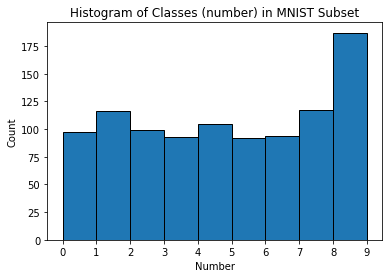

In [3]:
#2.2
# Extract the labels from the subset
numbers = [mnist_subset[i][1] for i in range(1000)]

# Plot a histogram of the labels
plt.hist(numbers, bins=range(10), edgecolor='black')
plt.xticks(range(10))
plt.xlabel("Number")
plt.ylabel("Count")
plt.title("Histogram of Classes (number) in MNIST Subset")
plt.show()

In [4]:
#2.3
import einops
import torchvision.transforms as transforms

# Create a subset of the dataset with 1,000 samples
mnist_subset = torch.utils.data.Subset(mnist_dataset, range(1000))

# Batch the subset of MNIST images into 25 samples per batch
mnist_subset_images = [sample[0] for sample in mnist_subset]
mnist_subset_images = torch.stack(mnist_subset_images, dim=0)
mnist_subset_images = mnist_subset_images.view(-1, 25, 1, 28, 28)
mnist_subset_images = einops.rearrange(mnist_subset_images, 'b x c h w -> b (x c h w)', x=25)
mnist_subset_images[0]



tensor([0., 0., 0.,  ..., 0., 0., 0.])

Text(0.5, 0.92, 'MNIST Image in 3D')

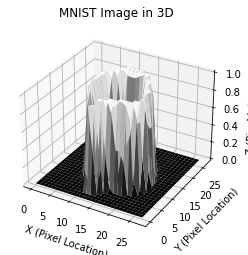

In [9]:
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Select a random image from the MNIST subset
random_index = random.randint(0, 999)
random_image = mnist_subset[random_index][0].numpy()

# Plot the image in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y = range(28), range(28)
X, Y = np.meshgrid(x, y)
Z = random_image.squeeze()
ax.plot_surface(X, Y, Z, cmap='gray')
ax.set_xlabel("X (Pixel Location)")
ax.set_ylabel("Y (Pixel Location)")
ax.set_zlabel("Z (Pixel Intensity)")
plt.title("MNIST Image in 3D")
#plt.show()

# Problem 2.2 Time Series

Problem 1

Text(0.5, 1.0, 'Energy Consumption over the entire Period')

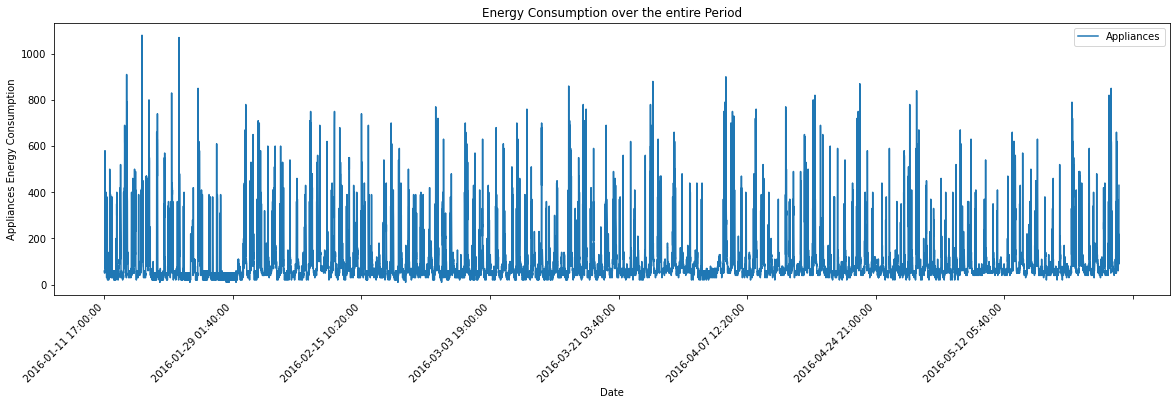

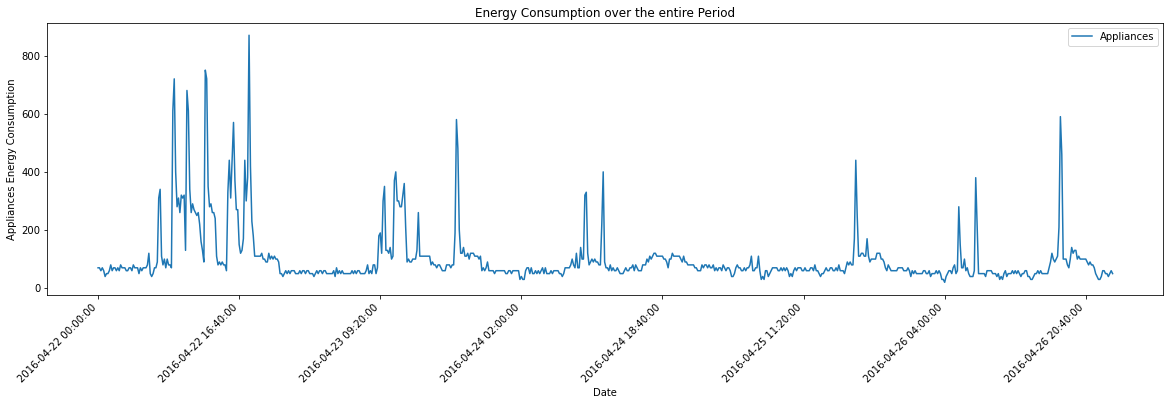

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv")

# Plot the appliances energy consumption for the entire period
df_whole = df
df.plot(x ='date', y = 'Appliances', figsize = (20,5))
plt.xlabel('Date')
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('Appliances Energy Consumption')
plt.title('Energy Consumption over the entire Period')

df_week = df[df['date'].between('2016-04-22','2016-04-27')]  
df_week.plot(x ='date', y = 'Appliances', figsize = (20,5))
plt.xlabel('Date')
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('Appliances Energy Consumption')
plt.title('Energy Consumption over the entire Period')


Problem 2

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv")

# Select a week of data
week_start = 7000
week_end = week_start + 168
week_df = df.iloc[week_start:week_end]

# Resample the data to hourly intervals
hourly_df = week_df.set_index("date").resample("H").mean()

# Drop the "lights" column and transpose the data
hourly_consumption = hourly_df.drop("lights", axis=1).T.values

# Plot the heatmap
plt.imshow(hourly_consumption, cmap="hot")
plt.colorbar()
plt.title("Hourly Energy Consumption of Appliances for One Week")
plt.xlabel("Time (hours)")
plt.ylabel("Appliance")
plt.show()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

# Problem 2.3

In [23]:
import pandas as pd


airfoil = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat', delimiter = "\t")
airfoil.to_csv('airfoil_self_noise.csv', index = None)

airfoil
#airfoil              
airfoil.columns = ['Frequency', 'Angle of attack', 'chord length', 'Free-stream velocity', 'Suction side displacement', 'Sound pressure']
#finding the mean
airfoil['Frequency'].mean()

2887.769640479361

In [31]:
airfoil.std()

Frequency                    3153.162983
Angle of attack                 5.917509
chord length                    0.093471
Free-stream velocity           15.569029
Suction side displacement       0.013153
Sound pressure                  6.900864
dtype: float64

In [32]:
airfoil.median()

Frequency                    1600.000000
Angle of attack                 5.400000
chord length                    0.101600
Free-stream velocity           39.600000
Suction side displacement       0.004957
Sound pressure                125.719000
dtype: float64

In [ ]:
import pandas as pd
df_appliances = df_whole['Appliances']
df_appliances.hist(bins = 100)
plt.xlabel('Appliances Energy Consumption')
plt.ylabel('count')
plt.title('Energy Consumption histogram')

In [33]:
airfoil.kurtosis()

Frequency                    5.704083
Angle of attack             -0.413399
chord length                -1.035595
Free-stream velocity        -1.562758
Suction side displacement    2.215282
Sound pressure              -0.316058
dtype: float64

Text(0.5, 1.0, 'Energy Consumption vs Pressure')

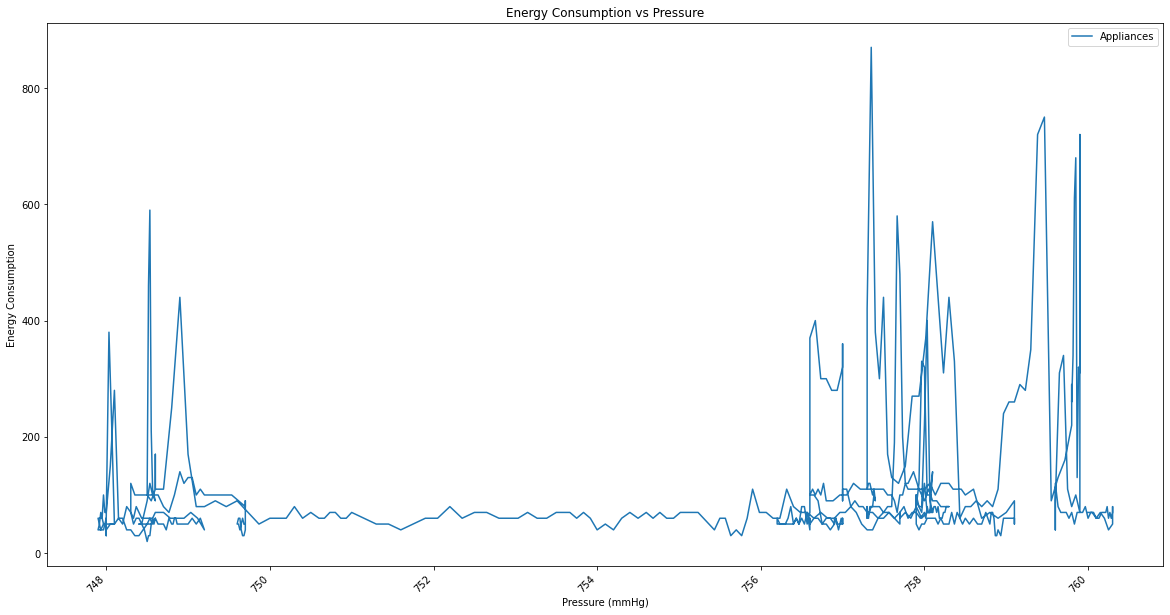

In [8]:

#2.5
df_week.plot( x = 'Press_mm_hg', y ='Appliances', figsize = (20,10), kind = 'line')
plt.xlabel('Pressure (mmHg)')
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption vs Pressure')

In [34]:
airfoil.skew()

Frequency                    2.136180
Angle of attack              0.688553
chord length                 0.458497
Free-stream velocity         0.237297
Suction side displacement    1.701196
Sound pressure              -0.418439
dtype: float64

In [9]:
df_week

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
14586,2016-04-22 00:00:00,70,0,22.700000,37.20,21.100000,37.900000,23.390000,37.290000,22.830000,...,20.20,38.590000,12.900000,760.000000,62.000000,4.000000,28.0,5.700000,43.189054,43.189054
14587,2016-04-22 00:10:00,70,0,22.700000,37.20,21.000000,38.000000,23.390000,37.290000,22.832857,...,20.20,38.663333,12.833333,760.050000,62.000000,3.500000,28.0,5.650000,36.057280,36.057280
14588,2016-04-22 00:20:00,60,0,22.700000,37.20,20.926667,38.060000,23.390000,37.400000,22.790000,...,20.20,38.730000,12.766667,760.100000,62.000000,3.000000,28.0,5.600000,6.565851,6.565851
14589,2016-04-22 00:30:00,70,0,22.700000,37.26,20.890000,38.230000,23.463333,37.466667,22.790000,...,20.20,38.790000,12.700000,760.150000,62.000000,2.500000,28.0,5.550000,9.681322,9.681322
14590,2016-04-22 00:40:00,60,0,22.700000,37.29,20.823333,38.290000,23.390000,37.433333,22.790000,...,20.23,38.826667,12.633333,760.200000,62.000000,2.000000,28.0,5.500000,37.986577,37.986577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15301,2016-04-26 23:10:00,50,0,21.700000,36.09,19.133333,37.723333,22.000000,35.790000,20.100000,...,19.39,36.966667,3.000000,749.616667,85.166667,4.333333,40.0,0.683333,1.284670,1.284670
15302,2016-04-26 23:20:00,40,0,21.633333,36.03,19.066667,37.700000,22.000000,35.790000,20.100000,...,19.39,37.126667,3.000000,749.633333,84.333333,4.666667,40.0,0.566667,9.602121,9.602121
15303,2016-04-26 23:30:00,50,0,21.600000,36.00,19.000000,37.626667,22.000000,35.863333,20.033333,...,19.39,37.260000,3.000000,749.650000,83.500000,5.000000,40.0,0.450000,14.999657,14.999657
15304,2016-04-26 23:40:00,60,0,21.533333,36.00,18.890000,37.626667,22.000000,35.826667,20.100000,...,19.39,37.433333,3.000000,749.666667,82.666667,5.333333,40.0,0.333333,3.069685,3.069685


In [48]:
print("min is\n\n", airfoil.min(), "\n\n")
print("Max is\n\n", airfoil.max())

min is

 Frequency                    200.000000
Angle of attack                0.000000
chord length                   0.025400
Free-stream velocity          31.700000
Suction side displacement      0.000401
Sound pressure               103.380000
dtype: float64 


Max is

 Frequency                    20000.000000
Angle of attack                 22.200000
chord length                     0.304800
Free-stream velocity            71.300000
Suction side displacement        0.058411
Sound pressure                 140.987000
dtype: float64
